# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

607

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
url = "http://api.openweathermap.org/data/2.5/weather?"

# build query and request results
cities_found = []
lat = []
lng = []
temp = []
humidity = []
clouds = []
speed = []
country = []
dt = []


for i, city in enumerate(cities):
    
    query_url = url + 'appid=' + weather_api_key + '&units=imperial' + '&q=' + city
    
    try:
        
        # Get weather data
        weather_response = requests.get(query_url)
        weather_json = weather_response.json()
        #print(weather_json)

        lat.append(weather_json['coord']['lat'])
        lng.append(weather_json['coord']['lon'])
        temp.append(weather_json['main']['temp'])
        humidity.append(weather_json['main']['humidity'])
        clouds.append(weather_json['clouds']['all'])
        speed.append(weather_json['wind']['speed'])
        country.append(weather_json['sys']['country'])
        dt.append(weather_json['dt'])

        cities_found.append(city)

        # Get the temperature from the response
        #print(f"The weather API responded with: {weather_json}.")
        print(f'Processing record {i + 1} of Set 1 | {city}')
    
    except:
        print("Error: " + city)

Processing record 1 of Set 1 | tuktoyaktuk
Processing record 2 of Set 1 | manokwari
Processing record 3 of Set 1 | mataura
Processing record 4 of Set 1 | butaritari
Processing record 5 of Set 1 | yeppoon
Processing record 6 of Set 1 | georgetown
Processing record 7 of Set 1 | ushuaia
Processing record 8 of Set 1 | fortuna
Processing record 9 of Set 1 | mwingi
Processing record 10 of Set 1 | toora-khem
Processing record 11 of Set 1 | ust-kut
Processing record 12 of Set 1 | ponsacco
Processing record 13 of Set 1 | praia da vitoria
Processing record 14 of Set 1 | mar del plata
Processing record 15 of Set 1 | sarangarh
Processing record 16 of Set 1 | yulara
Processing record 17 of Set 1 | bengkulu
Processing record 18 of Set 1 | hofn
Processing record 19 of Set 1 | cap malheureux
Processing record 20 of Set 1 | lebu
Error: illoqqortoormiut
Processing record 22 of Set 1 | rikitea
Processing record 23 of Set 1 | qaanaaq
Error: sentyabrskiy
Processing record 25 of Set 1 | tuatapere
Processing

Processing record 211 of Set 1 | sangar
Processing record 212 of Set 1 | hualmay
Processing record 213 of Set 1 | chokurdakh
Processing record 214 of Set 1 | puerto baquerizo moreno
Processing record 215 of Set 1 | monze
Processing record 216 of Set 1 | petropavlovsk-kamchatskiy
Processing record 217 of Set 1 | angoche
Processing record 218 of Set 1 | guerrero negro
Processing record 219 of Set 1 | ancud
Processing record 220 of Set 1 | katsuura
Processing record 221 of Set 1 | kaitangata
Processing record 222 of Set 1 | sanica
Processing record 223 of Set 1 | byron bay
Error: tsihombe
Processing record 225 of Set 1 | saldanha
Processing record 226 of Set 1 | nantucket
Error: opobo
Processing record 228 of Set 1 | nanortalik
Processing record 229 of Set 1 | banda aceh
Processing record 230 of Set 1 | panzhihua
Processing record 231 of Set 1 | nola
Processing record 232 of Set 1 | hokitika
Processing record 233 of Set 1 | iquique
Processing record 234 of Set 1 | kudeyevskiy
Processing r

Processing record 409 of Set 1 | kloulklubed
Processing record 410 of Set 1 | ola
Processing record 411 of Set 1 | shanghai
Processing record 412 of Set 1 | eureka
Processing record 413 of Set 1 | yadrin
Processing record 414 of Set 1 | hostotipaquillo
Processing record 415 of Set 1 | pozo colorado
Processing record 416 of Set 1 | bahia honda
Processing record 417 of Set 1 | gouyave
Processing record 418 of Set 1 | alice springs
Processing record 419 of Set 1 | quelimane
Processing record 420 of Set 1 | jiangyou
Error: rolim de moura
Processing record 422 of Set 1 | beyneu
Processing record 423 of Set 1 | college
Processing record 424 of Set 1 | podporozhye
Processing record 425 of Set 1 | sheffield lake
Processing record 426 of Set 1 | payo
Processing record 427 of Set 1 | villaviciosa
Processing record 428 of Set 1 | namatanai
Processing record 429 of Set 1 | wlodawa
Processing record 430 of Set 1 | texarkana
Processing record 431 of Set 1 | am timan
Error: mys shmidta
Processing rec

In [4]:
weather_dict = {
    "City": cities_found,
    "Latitude": lat,
    'Longitude': lng,
    "Max Temperature": temp,
    'Humidity': humidity,
    'Cloudiness': clouds,
    'Wind Speed': speed,
    'Country': country,
    'Date': dt
    
}
weather_data = pd.DataFrame(weather_dict)
weather_data

,City,Latitude,Longitude,Max Temperature,Humidity,Cloudiness,Wind Speed,Country,Date
0,tuktoyaktuk,69.4541,-133.0374,39.20,93,40,10.36,CA,1662703151
1,manokwari,-0.8667,134.0833,82.29,73,100,5.12,ID,1662703365
2,mataura,-46.1927,168.8643,45.91,89,32,2.51,NZ,1662703365
3,butaritari,3.0707,172.7902,81.70,76,91,15.35,KI,1662703366
4,yeppoon,-23.1333,150.7333,73.18,80,92,9.19,AU,1662703366
...,...,...,...,...,...,...,...,...,...
554,daitari,21.1000,85.7500,84.99,67,98,15.64,IN,1662703563
555,smithers,54.7804,-127.1743,46.06,91,18,3.15,CA,1662703563
556,neiafu,-18.6500,-173.9833,77.68,78,20,6.91,TO,1662703564
557,orlik,52.5178,99.8250,55.27,73,66,11.48,RU,1662703564


### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [5]:
weather_data.to_csv(
    path_or_buf = "../output_data/cities.csv"
)
weather_data.head()

,City,Latitude,Longitude,Max Temperature,Humidity,Cloudiness,Wind Speed,Country,Date
0,tuktoyaktuk,69.4541,-133.0374,39.20,93,40,10.36,CA,1662703151
1,manokwari,-0.8667,134.0833,82.29,73,100,5.12,ID,1662703365
2,mataura,-46.1927,168.8643,45.91,89,32,2.51,NZ,1662703365
3,butaritari,3.0707,172.7902,81.70,76,91,15.35,KI,1662703366
4,yeppoon,-23.1333,150.7333,73.18,80,92,9.19,AU,1662703366


In [6]:
weather_data.to_csv("../output_data/weather_data.csv", index = False)


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [7]:
print(f"The maximum humidity for the cities in the dataframe is {weather_data['Humidity'].max()}")


The maximum humidity for the cities in the dataframe is 100


In [23]:
#  Get the indices of cities that have humidity over 100%.
humidity_data_df = weather_data.loc[(weather_data['Humidity'] > 100)]
weather_data

,City,Latitude,Longitude,Max Temperature,Humidity,Cloudiness,Wind Speed,Country,Date
0,tuktoyaktuk,69.4541,-133.0374,39.20,93,40,10.36,CA,1662703151
1,manokwari,-0.8667,134.0833,82.29,73,100,5.12,ID,1662703365
2,mataura,-46.1927,168.8643,45.91,89,32,2.51,NZ,1662703365
3,butaritari,3.0707,172.7902,81.70,76,91,15.35,KI,1662703366
4,yeppoon,-23.1333,150.7333,73.18,80,92,9.19,AU,1662703366
...,...,...,...,...,...,...,...,...,...
554,daitari,21.1000,85.7500,84.99,67,98,15.64,IN,1662703563
555,smithers,54.7804,-127.1743,46.06,91,18,3.15,CA,1662703563
556,neiafu,-18.6500,-173.9833,77.68,78,20,6.91,TO,1662703564
557,orlik,52.5178,99.8250,55.27,73,66,11.48,RU,1662703564


In [24]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".

# clean_city_data = weather_data.drop([(weather_data['Humidity'] >= 100)])
# clean_city_data

## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

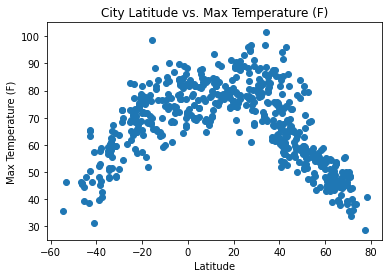

In [25]:
plt.title('City Latitude vs. Max Temperature (F)')
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (F)')

x1 = lat
y1 = temp

plt.scatter(x1, y1)

## Latitude vs. Humidity Plot

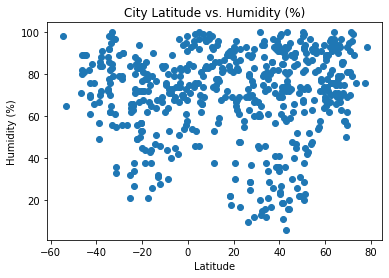

In [26]:
plt.title('City Latitude vs. Humidity (%)')
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')

x2 = lat
y2 = humidity

plt.scatter(x2, y2)

## Latitude vs. Cloudiness Plot

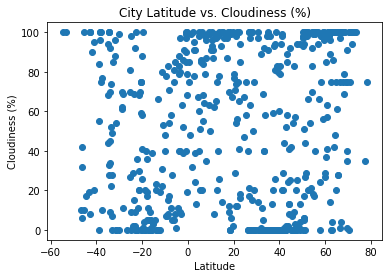

In [27]:
plt.title('City Latitude vs. Cloudiness (%)')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')

x3 = lat
y3 = clouds

plt.scatter(x3, y3)

## Latitude vs. Wind Speed Plot

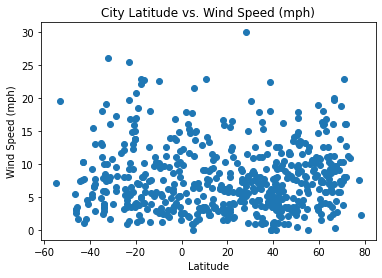

In [28]:
plt.title('City Latitude vs. Wind Speed (mph)')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')

x4 = lat
y4 = speed

plt.scatter(x4, y4)

## Linear Regression

In [29]:
lat_north = weather_data.loc[weather_data['Latitude'] > 0]
lat_south = weather_data.loc[weather_data['Latitude'] < 0]

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The value of r-squared is: 0.621690258145605


Text(0, 50, 'y = -0.62x + 90.99')

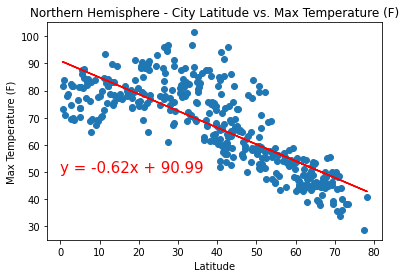

In [30]:
plt.title('Northern Hemisphere - City Latitude vs. Max Temperature (F)')
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (F)')

x5 = lat_north['Latitude']
y5 = lat_north['Max Temperature']

plt.scatter(x5, y5)

(slope, intercept, r, p, se) = linregress(x5, y5)
regress_values = x5 * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

print(f"The value of r-squared is: {r**2}")
plt.plot(x5,regress_values,"r-")
plt.annotate(line_eq,(0,50),fontsize=15,color="red")

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The value of r-squared is: 0.5860741440745999


Text(0, 50, 'y = 0.73x + 82.68')

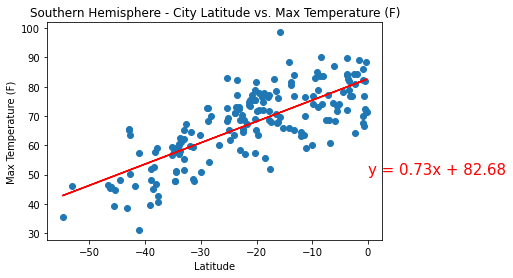

In [31]:
plt.title('Southern Hemisphere - City Latitude vs. Max Temperature (F)')
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (F)')

x6 = lat_south['Latitude']
y6 = lat_south['Max Temperature']

plt.scatter(x6, y6)

(slope, intercept, r, p, se) = linregress(x6, y6)
regress_values = x6 * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

print(f"The value of r-squared is: {r**2}")
plt.plot(x6,regress_values,"r-")
plt.annotate(line_eq,(0,50),fontsize=15,color="red")

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The value of r-squared is: 0.0014778330659484956


Text(0, 50, 'y = 0.04x + 69.55')

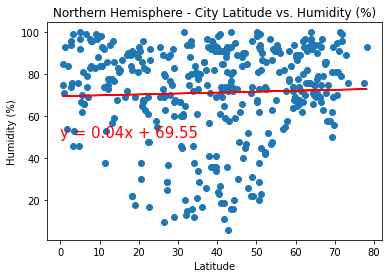

In [32]:
plt.title('Northern Hemisphere - City Latitude vs. Humidity (%)')
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')

x7 = lat_north['Latitude']
y7 = lat_north['Humidity']

plt.scatter(x7, y7)

(slope, intercept, r, p, se) = linregress(x7, y7)
regress_values = x7 * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

print(f"The value of r-squared is: {r**2}")
plt.plot(x7,regress_values,"r-")
plt.annotate(line_eq,(0,50),fontsize=15,color="red")

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The value of r-squared is: 0.026571124977247895


Text(0, 50, 'y = -0.22x + 64.71')

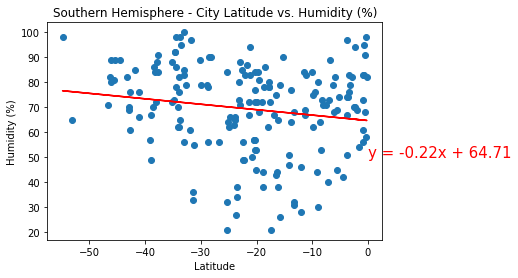

In [33]:
plt.title('Southern Hemisphere - City Latitude vs. Humidity (%)')
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')

x8 = lat_south['Latitude']
y8 = lat_south['Humidity']

plt.scatter(x8, y8)

(slope, intercept, r, p, se) = linregress(x8, y8)
regress_values = x8 * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

print(f"The value of r-squared is: {r**2}")
plt.plot(x8,regress_values,"r-")
plt.annotate(line_eq,(0,50),fontsize=15,color="red")

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The value of r-squared is: 0.0014310475310589667


Text(0, 50, 'y = 0.08x + 50.69')

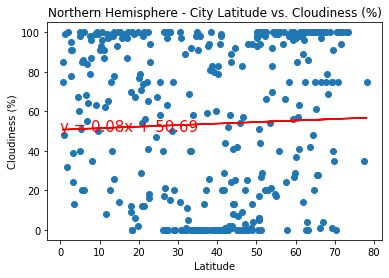

In [34]:
plt.title('Northern Hemisphere - City Latitude vs. Cloudiness (%)')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')

x9 = lat_north['Latitude']
y9 = lat_north['Cloudiness']

plt.scatter(x9, y9)

(slope, intercept, r, p, se) = linregress(x9, y9)
regress_values = x9 * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

print(f"The value of r-squared is: {r**2}")
plt.plot(x9,regress_values,"r-")
plt.annotate(line_eq,(0,50),fontsize=15,color="red")

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The value of r-squared is: 0.006578085933379893


Text(0, 50, 'y = -0.22x + 38.95')

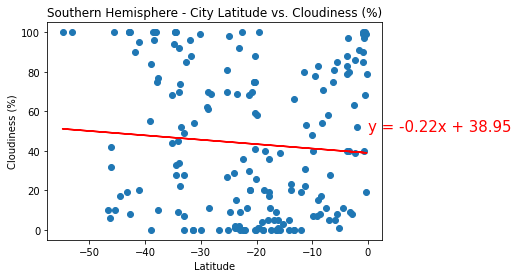

In [35]:
plt.title('Southern Hemisphere - City Latitude vs. Cloudiness (%)')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')

x10 = lat_south['Latitude']
y10 = lat_south['Cloudiness']

plt.scatter(x10, y10)

(slope, intercept, r, p, se) = linregress(x10, y10)
regress_values = x10 * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

print(f"The value of r-squared is: {r**2}")
plt.plot(x10,regress_values,"r-")
plt.annotate(line_eq,(0,50),fontsize=15,color="red")

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The value of r-squared is: 0.014304274671915406


Text(0, 50, 'y = 0.03x + 6.49')

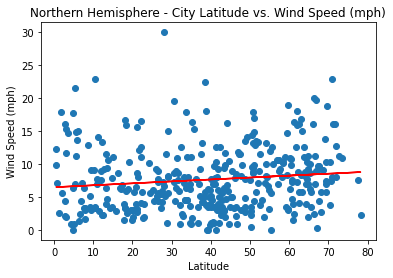

In [36]:
plt.title('Northern Hemisphere - City Latitude vs. Wind Speed (mph)')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')

x11 = lat_north['Latitude']
y11 = lat_north['Wind Speed']

plt.scatter(x11, y11)

(slope, intercept, r, p, se) = linregress(x11, y11)
regress_values = x11 * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

print(f"The value of r-squared is: {r**2}")
plt.plot(x11,regress_values,"r-")
plt.annotate(line_eq,(0,50),fontsize=15,color="red")

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The value of r-squared is: 5.302094636877371e-05


Text(0, 50, 'y = -0.0x + 8.09')

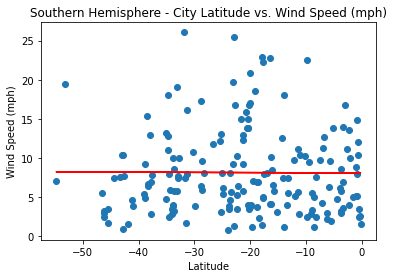

In [37]:
plt.title('Southern Hemisphere - City Latitude vs. Wind Speed (mph)')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')

x12 = lat_south['Latitude']
y12 = lat_south['Wind Speed']

plt.scatter(x12, y12)

(slope, intercept, r, p, se) = linregress(x12, y12)
regress_values = x12 * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

print(f"The value of r-squared is: {r**2}")
plt.plot(x12,regress_values,"r-")
plt.annotate(line_eq,(0,50),fontsize=15,color="red")